In [2]:
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
planets = sb.load_dataset('planets')

In [3]:
planets.shape

(1035, 6)

In [7]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null object
number            1035 non-null int64
orbital_period    992 non-null float64
mass              513 non-null float64
distance          808 non-null float64
year              1035 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [12]:
planets.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [6]:
planets.head(3)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011


In [17]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [22]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

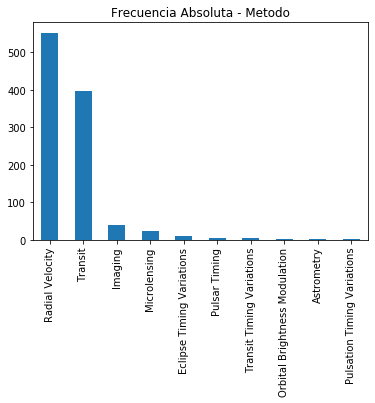

In [39]:
planets['method'].value_counts().plot(kind="bar")
plt.title("Frecuencia Absoluta - Metodo")
plt.show()

In [44]:
print(f'Vemos para cada tecnica la distribucion de la variable año')
planets.groupby('method')['year'].describe()

Vemos para cada tecnica la distribucion de la variable año


,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [5]:
decade = 10*(planets['year']//10)

In [6]:
decade = decade.astype(str)+"s"

In [7]:
planets.groupby(['method',decade])[['number']].sum()

number
method                        year         
Astrometry                    2010s       2
Eclipse Timing Variations     2000s       5
                              2010s      10
Imaging                       2000s      29
                              2010s      21
Microlensing                  2000s      12
                              2010s      15
Orbital Brightness Modulation 2010s       5
Pulsar Timing                 1990s       9
                              2000s       1
                              2010s       1
Pulsation Timing Variations   2000s       1
Radial Velocity               1980s       1
                              1990s      52
                              2000s     475
                              2010s     424
Transit                       2000s      64
                              2010s     712
Transit Timing Variations     2010s       9

In [68]:
planets.groupby(['method',decade])['number'].sum().unstack().fillna(0)

year,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0
